## Report 3: Local search

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245

Source code: https://github.com/Oskshust/evo_comp/tree/main/3

#### PROBLEM DESCRIPTION:

In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The aim of the problem is to compare the paths created by greedy heuristics from the previous assignment with local search solutions. We run each greedy method 200 times - each time we chose the different vertex as the starting node. For the random method, the starting vertex is chosen randomly in every iteration.

In [2]:
from scripts import *

np.random.seed(123)

a = "../data/TSPA.csv"
b = "../data/TSPB.csv"
c = "../data/TSPC.csv"
d = "../data/TSPD.csv"

We define two-nodes exchange neighbourhood as follows:

```
    def get_neighbourhood_2n(solution, matrix):
        neighbors = []
    
        # intra-route
        for i in range(solution_length-1):
            for j in range(i + 1, solution_length):
                neighbor = solution.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                delta = calculate_delta(solution, matrix, neighbor[i], j) + calculate_delta(solution, matrix, neighbor[j], i)
                neighbors.append((neighbor, delta))
    
        all_nodes = set(range(matrix.shape))
        available_nodes = all_nodes - set(solution)

        # inter-route
        for i in range(solution_length):
            for node in available_nodes:
                neighbor = solution.copy()
                neighbor[i] = node
                delta = calculate_delta(solution, matrix, node, i)
                neighbors.append((neighbor, delta))
    
        return neighbors
```

And we calculate delta for those operations as follows:

```
    # m_id - id of vertex martix-wise, s_id - id of vertex solution-wise,
    def calculate_delta(solution, matrix, m_id_in, s_id_out):
        prev_vertex = solution[s_id_out - 1]
        next_vertex = solution[(s_id_out + 1) % len(solution)]

        cost_out = matrix[prev_vertex][solution[s_id_out]] + matrix[solution[s_id_out]][next_vertex]

        cost_in = matrix[prev_vertex][m_id_in] + matrix[m_id_in][next_vertex]
        
        return cost_in - cost_out
```

## Steepest search, two-nodes exchange pseudocode:
(starting solution is either random solution or weighted regret heuristic solution from previous assignments)
```
def steepest_2n(matrix, starting_sol):
    best_sol = starting_sol
    best_delta = 0
    neighbourhood = get_neighbourhood_2n(starting_sol, matrix)
    
    while len(neighbourhood):
        deltas = np.array([delta for _, delta in neighbourhood])
        best_index = np.argmin(deltas)
        probably_best_sol, best_delta = neighbourhood[best_index]
        if best_delta >= 0:
            break
        best_sol, best_delta = neighbourhood[best_index]
        neighbourhood = get_neighbourhood_2n(best_sol, matrix)
        
    return best_sol, calculate_cost(best_sol, matrix)
```

## Steepest search, two-nodes exchange, random start

Best cost: 98891.0
Worst cost: 123673.0
Mean cost after 200 solutions: 111047.595


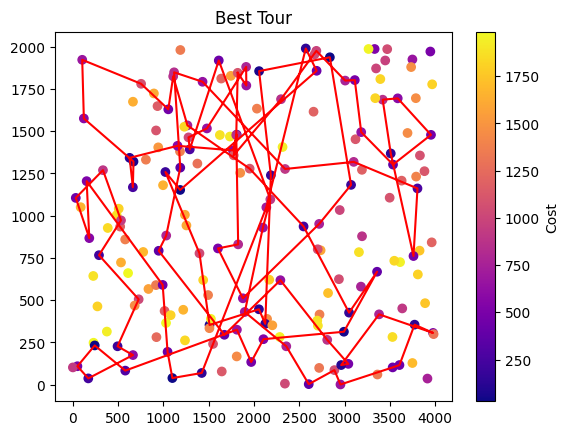

CPU times: user 16min 32s, sys: 203 ms, total: 16min 32s
Wall time: 16min 32s


In [ ]:
%%time
run_steepest_2n_r_experiment(a)

Best cost: 91837.0
Worst cost: 119797.0
Mean cost after 200 solutions: 106037.08


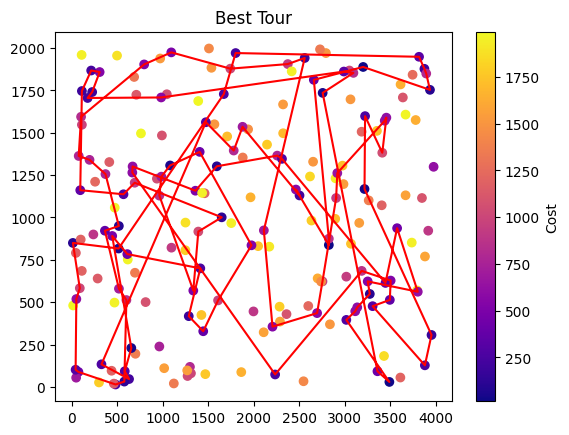

CPU times: user 16min 34s, sys: 180 ms, total: 16min 34s
Wall time: 16min 34s


In [ ]:
%%time
run_steepest_2n_r_experiment(b)

Best cost: 67549.0
Worst cost: 87901.0
Mean cost after 200 solutions: 76945.6


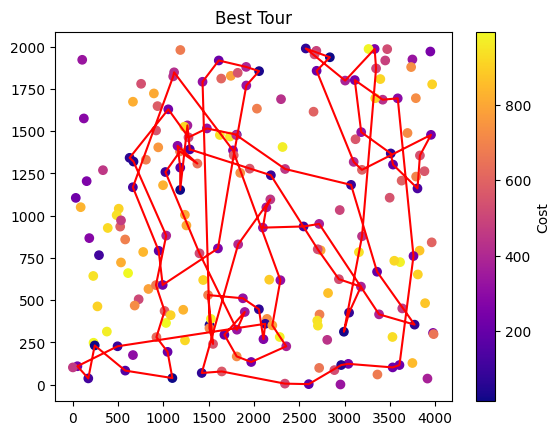

CPU times: user 18min 7s, sys: 130 ms, total: 18min 7s
Wall time: 18min 7s


In [ ]:
%%time
run_steepest_2n_r_experiment(c)

Best cost: 60591.0
Worst cost: 89416.0
Mean cost after 200 solutions: 75338.875


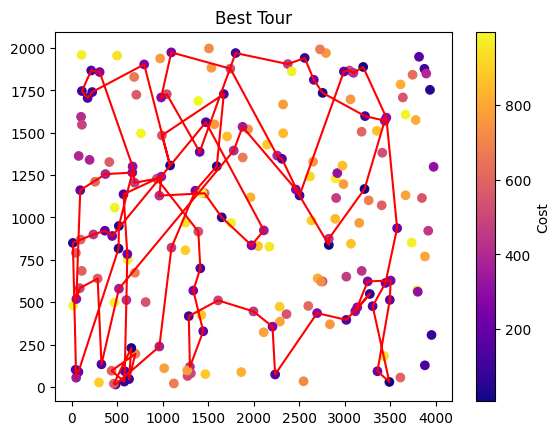

CPU times: user 18min 9s, sys: 180 ms, total: 18min 10s
Wall time: 18min 9s


In [ ]:
%%time
run_steepest_2n_r_experiment(d)

## Steepest search, two-nodes exchange, the best greedy construction heuristic

#### PSEUDOCODE:

```
 TODO
```

Best cost: 74563.0
Worst cost: 78866.0
Mean cost after 200 solutions: 76143.855


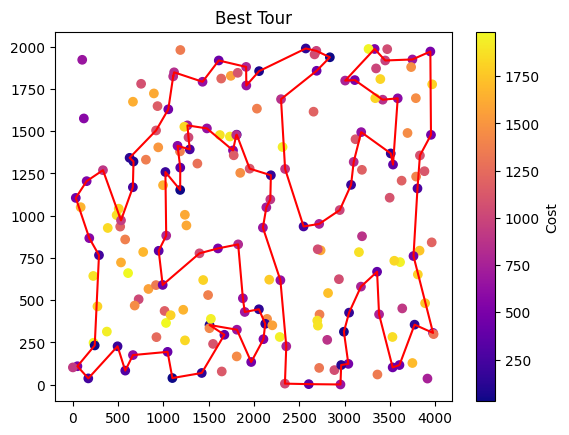

CPU times: user 41min 22s, sys: 366 ms, total: 41min 22s
Wall time: 41min 22s


In [ ]:
%%time
run_steepest_2n_bgch_experiment(a)

Best cost: 69368.0
Worst cost: 77708.0
Mean cost after 200 solutions: 71544.235


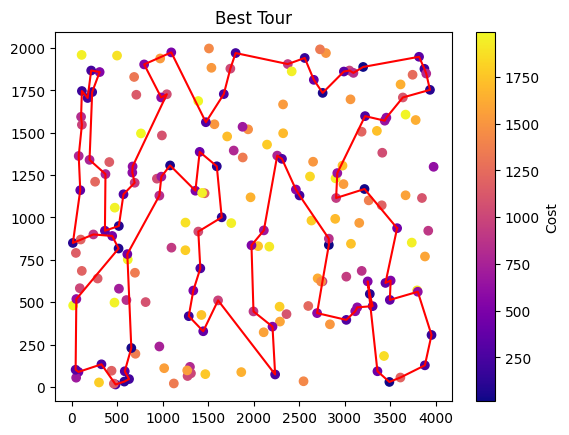

CPU times: user 37min 37s, sys: 510 ms, total: 37min 37s
Wall time: 37min 37s


In [ ]:
%%time
run_steepest_2n_bgch_experiment(b)

Best cost: 52896.0
Worst cost: 59342.0
Mean cost after 200 solutions: 55515.22


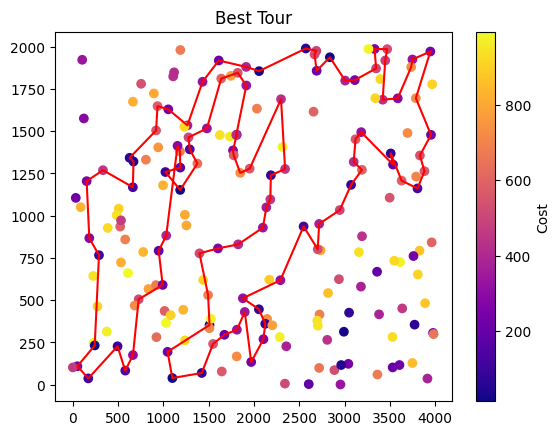

CPU times: user 36min, sys: 544 ms, total: 36min 1s
Wall time: 36min


In [ ]:
%%time
run_steepest_2n_bgch_experiment(c)

Best cost: 48613.0
Worst cost: 58982.0
Mean cost after 200 solutions: 53334.095


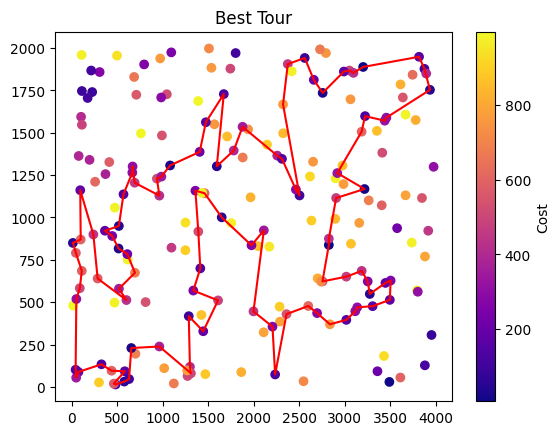

CPU times: user 35min 42s, sys: 320 ms, total: 35min 42s
Wall time: 35min 42s


In [ ]:
%%time
run_steepest_2n_bgch_experiment(d)

## Steepest search, two-edges exchange, random start

#### PSEUDOCODE:

```
 TODO
```

Best cost: 75066.0
Worst cost: 81579.0
Mean cost after 200 solutions: 77901.29


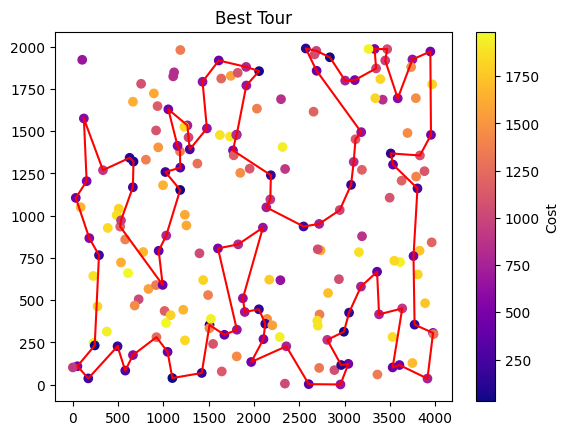

CPU times: user 24min 24s, sys: 298 ms, total: 24min 24s
Wall time: 24min 24s


In [ ]:
%%time
run_steepest_2e_r_experiment(a)

Best cost: 68289.0
Worst cost: 76800.0
Mean cost after 200 solutions: 71252.885


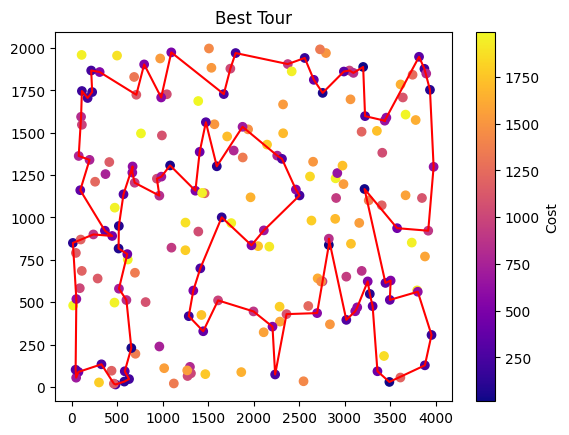

CPU times: user 23min 18s, sys: 190 ms, total: 23min 18s
Wall time: 23min 18s


In [ ]:
%%time
run_steepest_2e_r_experiment(b)

Best cost: 49378.0
Worst cost: 54499.0
Mean cost after 200 solutions: 51490.995


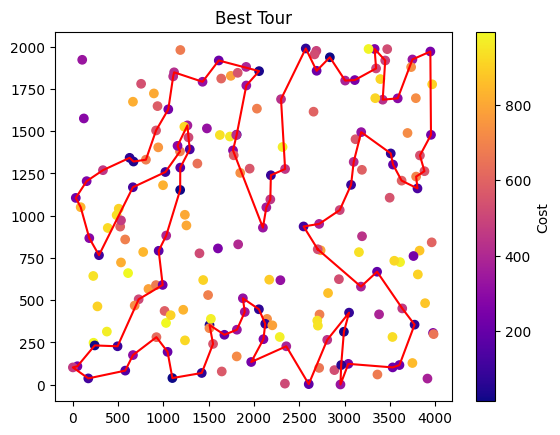

CPU times: user 22min 10s, sys: 212 ms, total: 22min 10s
Wall time: 22min 10s


In [ ]:
%%time
run_steepest_2e_r_experiment(c)

Best cost: 45271.0
Worst cost: 51721.0
Mean cost after 200 solutions: 48282.605


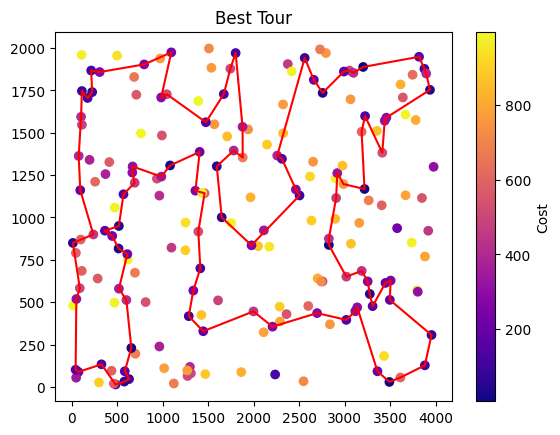

CPU times: user 21min 12s, sys: 170 ms, total: 21min 13s
Wall time: 21min 12s


In [ ]:
%%time
run_steepest_2e_r_experiment(d)

## Steepest search, two-edges exchange, the best greedy construction heuristic

#### PSEUDOCODE:

```
 TODO
```

In [ ]:
# run_steepest_2e_bgch_experiment(a)

In [ ]:
# run_steepest_2e_bgch_experiment(b)

In [ ]:
# run_steepest_2e_bgch_experiment(c)

In [ ]:
# run_steepest_2e_bgch_experiment(d)

## Greedy local search, two-nodes exchange, random start

### PSEUDOCODE

```
greedy_2_edges(solution, cost_matrix):
    best_solution <- solution
    best_delta <- 0
    candidate_best_solution, best_delta <- get_random_neighbor_2e(best_solution, cost_matrix)

    while best_delta < 0:
        best_solution <- candidate_best_solution
        candidate_best_solution, best_delta <- get_random_neighbor_2e(best_solution, cost_matrix)

    return best_solution, cost(best_solution)


get_random_neighbor_2e(solution, cost_matrix):
    action <- random_choice(["inter", "intra"])

    if action == "intra":
        i, j <- random_choice(range(len(solution)), size=2)
        neighbor <- concatenate(solution[:i], reverse(solution[i:j+1], solution[j+1:]))
        delta <- calculate_edge_delta(solution, matrix, i, j)
    else:
        all_nodes <- set(range(len(matrix)))
        available_nodes <- list(all_nodes - set(solution))

        i <- random_choice(range(len(solution)))
        j <- random_choice(range(len(available_nodes)))

        neighbor <- copy(solution)
        neighbor[i] <- available_nodes[j]
        delta <- calculate_delta(solution, matrix, available_nodes[j], i)
    
    return neighbor, delta

calculate_edge_delta(solution, cost_matrix, start, end):
    prev_vertex <- solution[start - 1]
    next_vertex <- solution[(end + 1) % len(solution)]

    cost_out <- cost_matrix[solution[start]][prev_vertex] + matrix[solution[end]][next_vertex]
    cost_in <- cost_matrix[solution[end]][prev_vertex] + matrix[solution[start]][next_vertex]

    return cost_in - cost_out

```

Best cost: 239050.0
Worst cost: 291022.0
Mean cost after 200 solutions: 265048.63


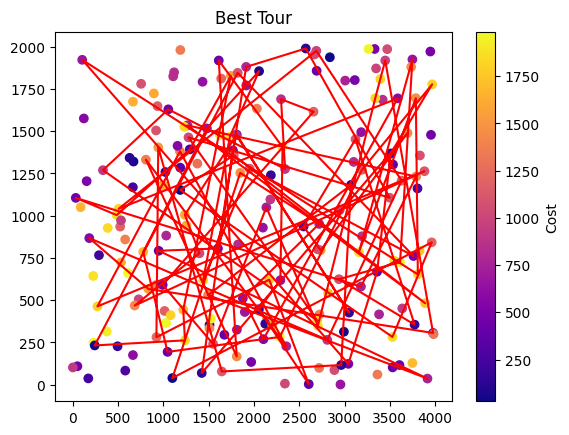

CPU times: user 423 ms, sys: 186 ms, total: 608 ms
Wall time: 416 ms


In [ ]:
%%time
run_greedy_2n_r_experiment(a)

Best cost: 237313.0
Worst cost: 303914.0
Mean cost after 200 solutions: 265915.415


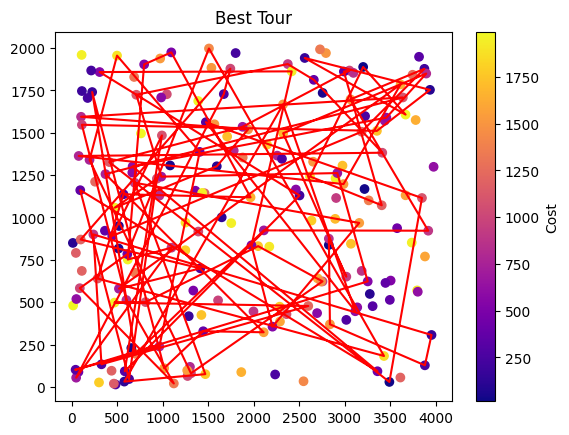

CPU times: user 335 ms, sys: 184 ms, total: 519 ms
Wall time: 331 ms


In [ ]:
%%time
run_greedy_2n_r_experiment(b)

Best cost: 189682.0
Worst cost: 240329.0
Mean cost after 200 solutions: 214910.095


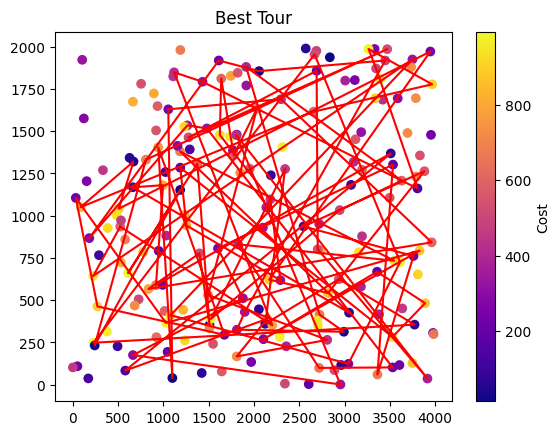

CPU times: user 281 ms, sys: 192 ms, total: 474 ms
Wall time: 284 ms


In [ ]:
%%time
run_greedy_2n_r_experiment(c)

Best cost: 195085.0
Worst cost: 239251.0
Mean cost after 200 solutions: 218432.105


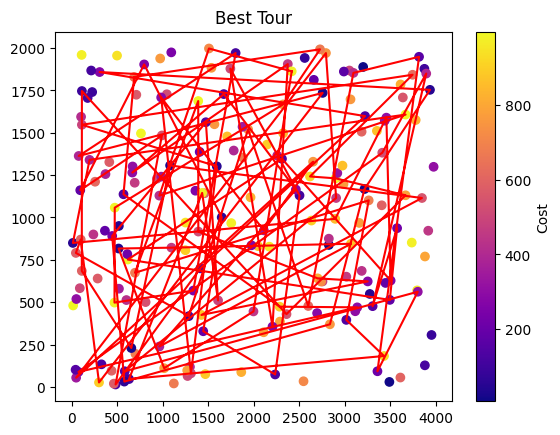

CPU times: user 343 ms, sys: 193 ms, total: 536 ms
Wall time: 347 ms


In [ ]:
%%time
run_greedy_2n_r_experiment(d)

## Greedy local search, two-nodes exchange, the best greedy construction heuristic

Best cost: 74563.0
Worst cost: 79037.0
Mean cost after 200 solutions: 76445.205


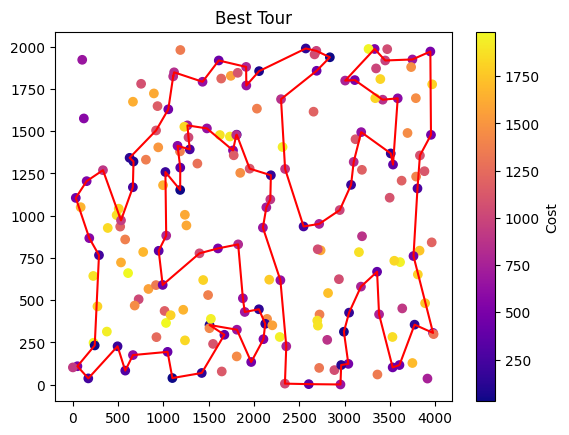

CPU times: user 40min 44s, sys: 439 ms, total: 40min 44s
Wall time: 40min 44s


In [ ]:
%%time
run_greedy_2n_bgch_experiment(a)

Best cost: 69453.0
Worst cost: 77709.0
Mean cost after 200 solutions: 71828.865


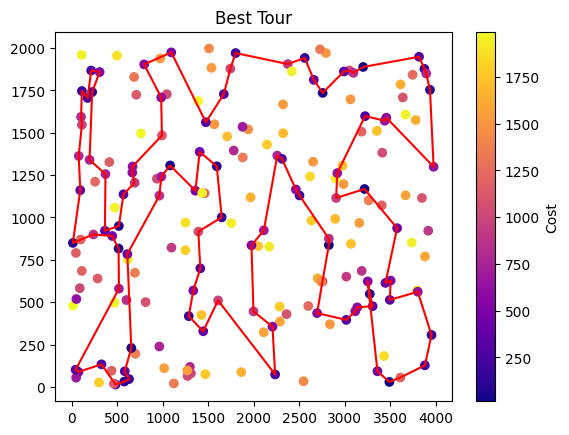

CPU times: user 36min 54s, sys: 570 ms, total: 36min 55s
Wall time: 36min 55s


In [ ]:
%%time
run_greedy_2n_bgch_experiment(b)

Best cost: 53029.0
Worst cost: 60243.0
Mean cost after 200 solutions: 55889.185


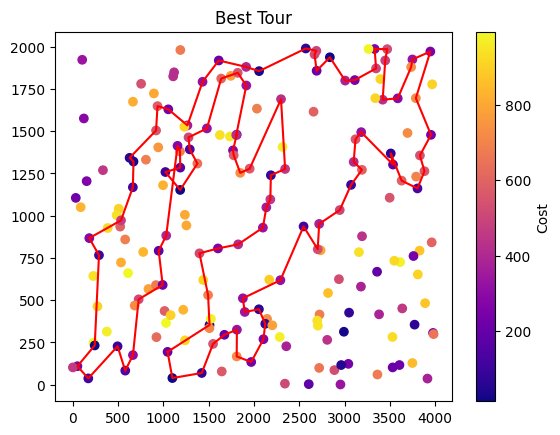

CPU times: user 35min 21s, sys: 860 ms, total: 35min 22s
Wall time: 35min 21s


In [ ]:
%%time
run_greedy_2n_bgch_experiment(c)

Best cost: 49165.0
Worst cost: 59081.0
Mean cost after 200 solutions: 53715.845


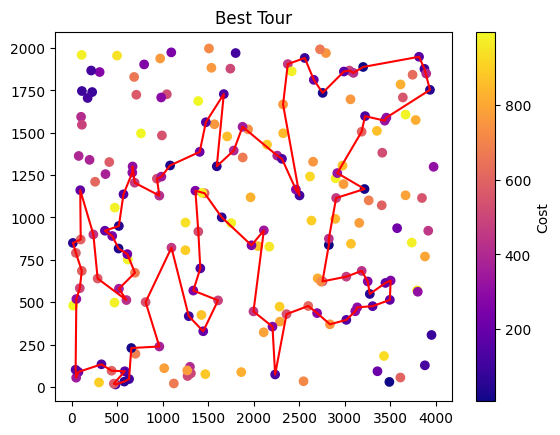

CPU times: user 35min 11s, sys: 640 ms, total: 35min 12s
Wall time: 35min 11s


In [ ]:
%%time
run_greedy_2n_bgch_experiment(d)

## Greedy local search, two-edges exchange, random start

Best cost: 243571.0
Worst cost: 832190.0
Mean cost after 200 solutions: 289516.48


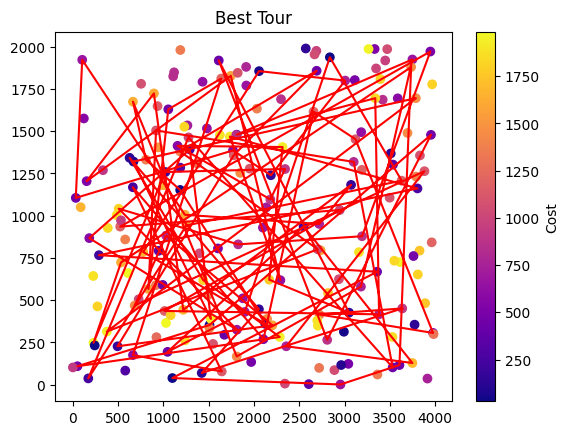

CPU times: user 332 ms, sys: 195 ms, total: 527 ms
Wall time: 338 ms


In [ ]:
%%time
run_greedy_2e_r_experiment(a)

Best cost: 241181.0
Worst cost: 889288.0
Mean cost after 200 solutions: 285382.965


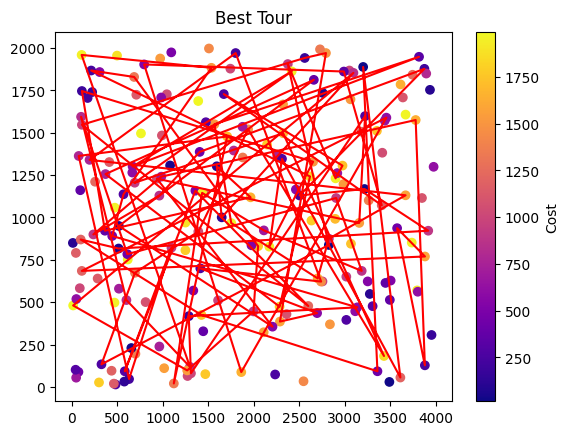

CPU times: user 331 ms, sys: 165 ms, total: 496 ms
Wall time: 308 ms


In [ ]:
%%time
run_greedy_2e_r_experiment(b)

Best cost: 192291.0
Worst cost: 543226.0
Mean cost after 200 solutions: 232452.625


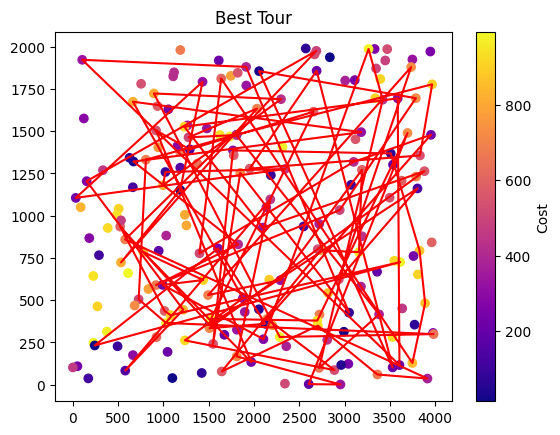

CPU times: user 309 ms, sys: 200 ms, total: 509 ms
Wall time: 320 ms


In [ ]:
%%time
run_greedy_2e_r_experiment(c)

Best cost: 198419.0
Worst cost: 615673.0
Mean cost after 200 solutions: 236312.22


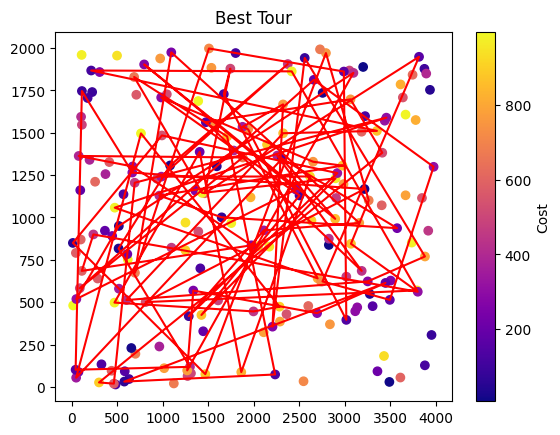

CPU times: user 364 ms, sys: 133 ms, total: 497 ms
Wall time: 310 ms


In [ ]:
%%time
run_greedy_2e_r_experiment(d)

## Greedy local search, two-edges exchange, the best greedy construction heuristic

In [ ]:
# run_greedy_2e_bgch_experiment(a)

In [ ]:
# run_greedy_2e_bgch_experiment(b)

In [ ]:
# run_greedy_2e_bgch_experiment(c)

In [ ]:
# run_greedy_2e_bgch_experiment(d)

## Results

### Objective function values:

| Algorithm | Instance A  | Instance B   | Instance C   | Instance D   |
|-----------|----------|----------|----------|----------|
| RANDOM | 264750.185 (241153 - 298242) | 266304.945 (240380 - 296499) | 214950.675 (188548 - 239747) | 218555.1 (194917 - 246170) |
| NEAREST_N  | 87679.135 (84471 - 95013) | 79282.58 (77448 - 82631) | 58872.68 (56304 - 63697) | 54290.68 (50335 - 59846) |
| G_CYCLE  | 78871.415 (76270 - 84172) | 75752.16 (71970 - 80491)  | 56731.47 (53614 - 60247) | 54900.765 (50639 - 60031) |
| 2-regret  | 115926.5 (115650 - 116203) | 115489.285 (101374 - 126143) | 69722.2 (64432 - 73978) | 68686.81 (60313 - 74039) |
| **weighted 2-regret**  | 76445.205 (74563 - 79037) | 71828.865 (69453 - 77709) | 55889.185 (53029 - 60243) | 53715.845 (49165 - 59081) |
|-----------|----------|----------|----------|----------|
| steepestLS_2n_r  | avg(min-max) | avg(min-max) | avg(min-max) | avg(min-max) |
| steepestLS_2n_bgch  | avg(min-max) | avg(min-max) | avg(min-max) | avg(min-max) |
| steepestLS_2e_r  | avg(min-max) | avg(min-max) | avg(min-max) | avg(min-max) |
| steepestLS_2e_bgch  | avg(min-max) | avg(min-max) | avg(min-max) | avg(min-max) |
|-----------|----------|----------|----------|----------|
| greedyLS_2n_r  | avg(min-max) | avg(min-max) | avg(min-max) | avg(min-max) |
| greedyLS_2n_bgch  | avg(min-max) | avg(min-max) | avg(min-max) | avg(min-max) |
| greedyLS_2e_r  | avg(min-max) | avg(min-max) | avg(min-max) | avg(min-max) |
| greedyLS_2e_bgch  | avg(min-max) | avg(min-max) | avg(min-max) | avg(min-max) |

### Running times (s):

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| step_search_2n_r | 4.96 | 4.97 | 5.435 | 5.445 |
| step_search_2n_bgch | 12.41 | 11.285 | 10.805 | 10.71 |
| step_search_2e_r | 7.32 | 6.99 | 6.65 | 6.365 |
| step_search_2e_bgch | a | b | c | d |
|-----------|----------|----------|----------|----------|
| greedy_search_2n_r | 0.00208 | 0.001655 | 0.00142 | 0.001735 |
| greedy_search_2n_bgch | 12.22 | 11.075 | 10.61 | 10.56 |
| greedy_search_2e_r | 0.00169 | 0.00154 | 0.0016 | 0.00155 |
| greedy_search_2e_bgch | a | b | c | d |

### Local search results

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| steepest_search_2n_r | 111047(98891 - 123673) | 106037(91837 - 119797) | 76945(67549 - 87901) | 75338(60591 - 89416) |
| steepest_search_2n_bgch | 76143(74563 - 78866) | 71544(69368 - 77708) | 55515(52896 - 59342) | 53334(48613 - 58982) |
| steepest_search_2e_r | 77901(75066 - 81579) | 71252(68289 - 76800) | 51491(49378 - 54499) | 48282(45271 - 51721) |
| steepest_search_2e_bgch | a | b | c | d |
|-----------|----------|----------|----------|----------|
| greedy_search_2n_r | 265048(239050 - 291022) | 265915(237313 - 303914) | 214910(189682 - 240329) | 218432(195085 - 239251) |
| greedy_search_2n_bgch | 76445(74563 - 79037) | 71828(69453 - 77709) | 55889(53029 - 60243) | 53715(49165 - 59081) |
| greedy_search_2e_r | 289516(243571 - 832190) | 285382(241181 - 889288) | 232452(192291 - 543226) | 236312(198419 - 615673) |
| greedy_search_2e_bgch | a | b | c | d |

### CONCLUSIONS:

TODO